In [2]:
import numpy as np
import pandas as pd

# Generate sample data
np.random.seed(42)
X = np.random.rand(100, 5)  # 100 rows, 5 columns (features)
y = np.random.randint(0, 2, size=100)  # Binary target variable (0 or 1)

df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(5)])
df['target'] = y

df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.374540,0.950714,0.731994,0.598658,0.156019,1
1,0.155995,0.058084,0.866176,0.601115,0.708073,0
2,0.020584,0.969910,0.832443,0.212339,0.181825,0
3,0.183405,0.304242,0.524756,0.431945,0.291229,0
4,0.611853,0.139494,0.292145,0.366362,0.456070,0


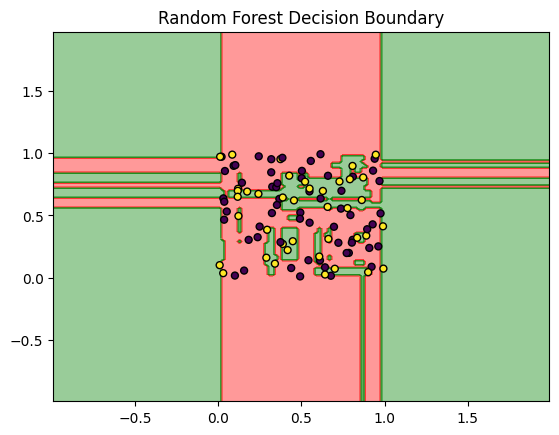

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Parameters
n_trees = 10
max_features = 2  # Random subset of features
trees = []

# We will only use the first two features for simplicity
X_subset = X[:, :2]  # First two features

# Building the Random Forest (Bagging + Random Feature Selection)
for _ in range(n_trees):
    # Bootstrap sampling (only on first two features)
    X_sample, y_sample = resample(X_subset, y, n_samples=100)
    
    # Decision tree with the first two features
    tree = DecisionTreeClassifier(max_features=max_features)
    tree.fit(X_sample, y_sample)
    
    # Add tree to the list of trees
    trees.append(tree)

# Function to plot decision boundary
def plot_decision_boundary(X, y, trees, resolution=0.02):
    # Define bounds for the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Aggregate predictions from all trees (Voting)
    Z = np.zeros_like(xx.ravel())
    for tree in trees:
        Z += tree.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = (Z > n_trees / 2).astype(int)  # Majority vote
    Z = Z.reshape(xx.shape)
    
    # Plotting
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green')))
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=25, edgecolor='k')
    plt.title("Random Forest Decision Boundary")
    plt.show()

# Plot decision boundary using first two features
plot_decision_boundary(X_subset, y, trees)

## Random Forest using Scikit-learn

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

In [14]:
X, y = make_classification(n_samples=100, n_features=5, n_classes=2, 
                           n_informative=3, n_redundant=0, random_state=42)

In [15]:
X_subset = X[:, :2]  # Use only the first two features for visualization

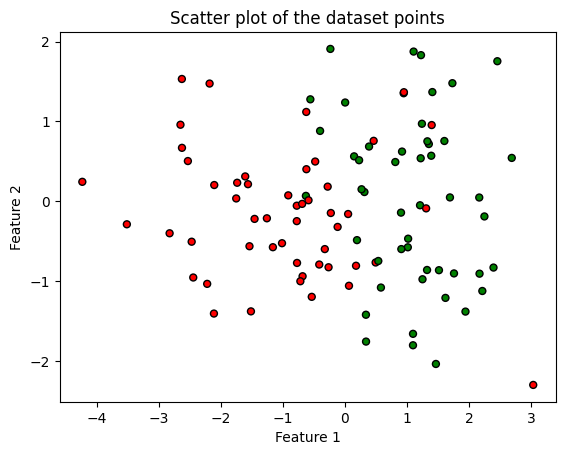

In [16]:
def plot_dataset(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=25, edgecolor='k', cmap=ListedColormap(('red', 'green')))
    plt.title("Scatter plot of the dataset points")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot the dataset points
plot_dataset(X_subset, y)

In [28]:
from sklearn.metrics import f1_score

rf_model = RandomForestClassifier(n_estimators=500, random_state=42, max_samples=40, max_features=3)
rf_model.fit(X_subset, y)

RandomForestClassifier(max_features=3, max_samples=40, n_estimators=500,
                       random_state=42)

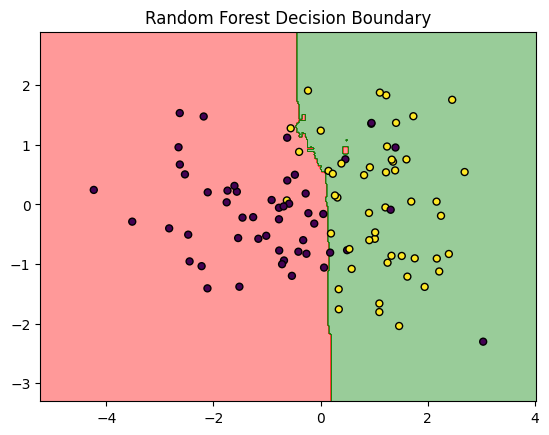

In [29]:
def plot_decision_boundary(X, y, model, resolution=0.02):
    # Define bounds of the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                         np.arange(y_min, y_max, resolution))
    
    # Predict class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plotting the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'green')))
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=25, edgecolor='k')
    plt.title("Random Forest Decision Boundary")
    plt.show()

# Step 5: Plot the decision boundary
plot_decision_boundary(X_subset, y, rf_model)